**Exercise 1.1**

1) Open up a new Jupyter notebook  
2) Download a few MTA turnstile data files  
3) Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row.


In [1]:
# Setup -- I will use Pandas for these exercises
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image

%matplotlib inline

pd.set_option('display.max_rows', 100)


# I chose the last four weeks, labeled from 1-4 from furthest back to most recent
week1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160827.txt')
week2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160903.txt')
week3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160910.txt')
week4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_160917.txt')

weeks = [week1, week2, week3, week4]

month = pd.concat(weeks)


#Create one column from the first 4
month['LOCATION'] = month['C/A'] + "," + month['UNIT'] + "," + month['SCP'] + "," + month['STATION']

# Drop the trams, since they aren't turnstiles and are different in several respects
month = month[month['C/A'] != 'TRAM1']
month = month[month['C/A'] != 'TRAM2']

# Delete superfluous columns
month = month.drop(['C/A', 'UNIT', 'SCP', 'STATION'], axis=1, errors ="ignore")

# Reorder columns so LOCATION is at the front
cols = month.columns.tolist()
cols = cols[-1:] + cols[:-1]
month = month[cols]

print month.info()
month.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770831 entries, 0 to 192457
Data columns (total 8 columns):
LOCATION                                                                770831 non-null object
LINENAME                                                                770831 non-null object
DIVISION                                                                770831 non-null object
DATE                                                                    770831 non-null object
TIME                                                                    770831 non-null object
DESC                                                                    770831 non-null object
ENTRIES                                                                 770831 non-null int64
EXITS                                                                   770831 non-null int64
dtypes: int64(2), object(6)
memory usage: 52.9+ MB
None


,LOCATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,"A002,R051,02-00-00,59 ST",NQR456,BMT,08/20/2016,00:00:00,REGULAR,5790246,1963095
1,"A002,R051,02-00-00,59 ST",NQR456,BMT,08/20/2016,04:00:00,REGULAR,5790275,1963101
2,"A002,R051,02-00-00,59 ST",NQR456,BMT,08/20/2016,08:00:00,REGULAR,5790284,1963123
3,"A002,R051,02-00-00,59 ST",NQR456,BMT,08/20/2016,12:00:00,REGULAR,5790377,1963178
4,"A002,R051,02-00-00,59 ST",NQR456,BMT,08/20/2016,16:00:00,REGULAR,5790605,1963230
5,"A002,R051,02-00-00,59 ST",NQR456,BMT,08/20/2016,20:00:00,REGULAR,5790926,1963287
6,"A002,R051,02-00-00,59 ST",NQR456,BMT,08/21/2016,00:00:00,REGULAR,5791095,1963314
7,"A002,R051,02-00-00,59 ST",NQR456,BMT,08/21/2016,04:00:00,REGULAR,5791132,1963319
8,"A002,R051,02-00-00,59 ST",NQR456,BMT,08/21/2016,08:00:00,REGULAR,5791141,1963334
9,"A002,R051,02-00-00,59 ST",NQR456,BMT,08/21/2016,12:00:00,REGULAR,5791217,1963404


**Exercise 1.2**

Let's turn this into a time series. For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the count of entries. 

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the dateutil module to convert it into a datetime object. For an example check this StackOverflow question.

In [2]:
# Merge date and time into a single column and then transform values into datetime objects
month['DATE/TIME'] = month['DATE'] + " " + month['TIME']
month['DATE/TIME'] = pd.to_datetime(month['DATE/TIME'], infer_datetime_format=True)

# Eliminate superfluous columns & reorder
month = month[['LOCATION', 'DATE/TIME', 'ENTRIES']]

print month.info()
month.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770831 entries, 0 to 192457
Data columns (total 3 columns):
LOCATION     770831 non-null object
DATE/TIME    770831 non-null datetime64[ns]
ENTRIES      770831 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 23.5+ MB
None


,LOCATION,DATE/TIME,ENTRIES
0,"A002,R051,02-00-00,59 ST",2016-08-20 00:00:00,5790246
1,"A002,R051,02-00-00,59 ST",2016-08-20 04:00:00,5790275
2,"A002,R051,02-00-00,59 ST",2016-08-20 08:00:00,5790284
3,"A002,R051,02-00-00,59 ST",2016-08-20 12:00:00,5790377
4,"A002,R051,02-00-00,59 ST",2016-08-20 16:00:00,5790605
5,"A002,R051,02-00-00,59 ST",2016-08-20 20:00:00,5790926
6,"A002,R051,02-00-00,59 ST",2016-08-21 00:00:00,5791095
7,"A002,R051,02-00-00,59 ST",2016-08-21 04:00:00,5791132
8,"A002,R051,02-00-00,59 ST",2016-08-21 08:00:00,5791141
9,"A002,R051,02-00-00,59 ST",2016-08-21 12:00:00,5791217


In [3]:
# Sort the data by LOCATION AND DATE/TIME, and reindex
month = month.sort_values(['LOCATION', 'DATE/TIME'])

month = month.reset_index()
month = month.drop('index', axis = 1)
month

,LOCATION,DATE/TIME,ENTRIES
0,"A002,R051,02-00-00,59 ST",2016-08-20 00:00:00,5790246
1,"A002,R051,02-00-00,59 ST",2016-08-20 04:00:00,5790275
2,"A002,R051,02-00-00,59 ST",2016-08-20 08:00:00,5790284
3,"A002,R051,02-00-00,59 ST",2016-08-20 12:00:00,5790377
4,"A002,R051,02-00-00,59 ST",2016-08-20 16:00:00,5790605
5,"A002,R051,02-00-00,59 ST",2016-08-20 20:00:00,5790926
6,"A002,R051,02-00-00,59 ST",2016-08-21 00:00:00,5791095
7,"A002,R051,02-00-00,59 ST",2016-08-21 04:00:00,5791132
8,"A002,R051,02-00-00,59 ST",2016-08-21 08:00:00,5791141
9,"A002,R051,02-00-00,59 ST",2016-08-21 12:00:00,5791217


**Exercise 1.3**

These counts are for every n hours. (What is n?) We want total daily entries.  
>> N equals 4.

Now make it that we again have the same keys, but now we have a single value for a single day, which is the total number of passengers that entered through this turnstile on this day.  

In [4]:
# Step 1: difference the data from above
month['PERIOD ENTRIES'] = month['ENTRIES'].diff()

# STEP 2: Shift all the rows up by one so the period totals for one day are all grouped ON that day
month['PERIOD ENTRIES'] = month['PERIOD ENTRIES'].shift(periods = -1)
month

,LOCATION,DATE/TIME,ENTRIES,PERIOD ENTRIES
0,"A002,R051,02-00-00,59 ST",2016-08-20 00:00:00,5790246,29.0
1,"A002,R051,02-00-00,59 ST",2016-08-20 04:00:00,5790275,9.0
2,"A002,R051,02-00-00,59 ST",2016-08-20 08:00:00,5790284,93.0
3,"A002,R051,02-00-00,59 ST",2016-08-20 12:00:00,5790377,228.0
4,"A002,R051,02-00-00,59 ST",2016-08-20 16:00:00,5790605,321.0
5,"A002,R051,02-00-00,59 ST",2016-08-20 20:00:00,5790926,169.0
6,"A002,R051,02-00-00,59 ST",2016-08-21 00:00:00,5791095,37.0
7,"A002,R051,02-00-00,59 ST",2016-08-21 04:00:00,5791132,9.0
8,"A002,R051,02-00-00,59 ST",2016-08-21 08:00:00,5791141,76.0
9,"A002,R051,02-00-00,59 ST",2016-08-21 12:00:00,5791217,168.0


In [5]:
# STEP 3: Check how often the values are negative
negatives = month['PERIOD ENTRIES'] < 0
print negatives.sum()
# This returns 7861, which is about 1% of the data.

7861


In [10]:
# STEP 4: 
# Drop entries for 2016-09-16. These contain the last value for each turnstile and differencing led to some inaccurate
# values.  So I'll have info for 08/20-09/15.
import datetime
month['DAY'] = month['DATE/TIME'].dt.date
month = month[month['DAY'] != datetime.date(2016, 9, 16)]

# Now drop remaining entries with negative values for 'PERIOD ENTRIES'.  These should reflect 
# turnstile resets. I lose some data, but not that much overall relative to the total. 
month = month[month['PERIOD ENTRIES'] >= 0]

# Reindex the data again
month = month.reset_index()
month = month.drop('index', axis = 1)
print month.info()
month.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 737373 entries, 0 to 737372
Data columns (total 5 columns):
LOCATION          737373 non-null object
DATE/TIME         737373 non-null datetime64[ns]
ENTRIES           737373 non-null int64
PERIOD ENTRIES    737373 non-null float64
DAY               737373 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 28.1+ MB
None


,LOCATION,DATE/TIME,ENTRIES,PERIOD ENTRIES,DAY
0,"A002,R051,02-00-00,59 ST",2016-08-20 00:00:00,5790246,29.0,2016-08-20
1,"A002,R051,02-00-00,59 ST",2016-08-20 04:00:00,5790275,9.0,2016-08-20
2,"A002,R051,02-00-00,59 ST",2016-08-20 08:00:00,5790284,93.0,2016-08-20
3,"A002,R051,02-00-00,59 ST",2016-08-20 12:00:00,5790377,228.0,2016-08-20
4,"A002,R051,02-00-00,59 ST",2016-08-20 16:00:00,5790605,321.0,2016-08-20
5,"A002,R051,02-00-00,59 ST",2016-08-20 20:00:00,5790926,169.0,2016-08-20
6,"A002,R051,02-00-00,59 ST",2016-08-21 00:00:00,5791095,37.0,2016-08-21
7,"A002,R051,02-00-00,59 ST",2016-08-21 04:00:00,5791132,9.0,2016-08-21
8,"A002,R051,02-00-00,59 ST",2016-08-21 08:00:00,5791141,76.0,2016-08-21
9,"A002,R051,02-00-00,59 ST",2016-08-21 12:00:00,5791217,168.0,2016-08-21


In [11]:
# STEP 5: Drop total entries column.  Then group 'PERIOD ENTRIES' by location and day, and sum the results.
month = month[['LOCATION', 'DATE/TIME', 'PERIOD ENTRIES']]

#Create a new dataframe to store the results of grouping and summing by day
# NOTE TO SELF: The .reset_index() is necessary to have daily_entries be a dataframe, since doing an operation on month 
# would otherwise turn the result into a dataframe object rather than a dataframe.
daily_entries = month.groupby([month['LOCATION'], month['DATE/TIME'].dt.date]).sum().reset_index()

#Give columns new appropriate names
daily_entries['DATE'] = daily_entries['DATE/TIME']
daily_entries['ENTRIES'] = daily_entries['PERIOD ENTRIES']
daily_entries = daily_entries[['LOCATION', 'DATE', 'ENTRIES']]

daily_entries

,LOCATION,DATE,ENTRIES
0,"A002,R051,02-00-00,59 ST",2016-08-20,849.0
1,"A002,R051,02-00-00,59 ST",2016-08-21,671.0
2,"A002,R051,02-00-00,59 ST",2016-08-22,1633.0
3,"A002,R051,02-00-00,59 ST",2016-08-23,1648.0
4,"A002,R051,02-00-00,59 ST",2016-08-24,1618.0
5,"A002,R051,02-00-00,59 ST",2016-08-25,1311.0
6,"A002,R051,02-00-00,59 ST",2016-08-26,1466.0
7,"A002,R051,02-00-00,59 ST",2016-08-27,810.0
8,"A002,R051,02-00-00,59 ST",2016-08-28,682.0
9,"A002,R051,02-00-00,59 ST",2016-08-29,1580.0


**Exercise 1.4**  

We will plot the daily time series for a turnstile.  (I've already added '%matplotlib inline' above in the first exercise.  I've also already done 'import matplotlib.pyplot as plt'). Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists: dates and counts. This should plot it:
plt.figure(figsize=(10,3))
plt.plot(dates,counts)

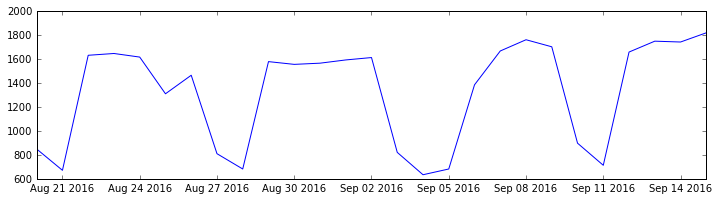

In [14]:
#Let's use the first turnstile, at 59th St.
dates = daily_entries['DATE'].iloc[0:27]
entry_counts = daily_entries['ENTRIES'].iloc[0:27]

plt.figure(figsize = (12,3)) # I made this bigger so I could read the x-axis labels better
plt.plot(dates, entry_counts);

**Exercise 1.5**

So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstiles-- same value for the C/A, UNIT and STATION columns, different values for the SCP column. We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.

In [15]:
# I  need to re-do most of the code above to make this work, because at the beginning I dropped all of the individual
# columns when I combined the C/A, UNIT, STATION, and SCP info together.  Guess that's a lesson for the future.
# So that's STEP 1 (everything in this cell):

df = pd.concat(weeks)
df.columns = [x.strip().replace(' ', '_') for x in df.columns]

#Create one column from C/A, UNIT, and STATION
df['LOCATION'] = df['C/A'] + "," + df['UNIT'] + "," + df['STATION']

# Drop the trams
df = df[df['C/A'] != 'TRAM1']
df = df[df['C/A'] != 'TRAM2']

# Merge date and time into a single column and then transform values into datetime objects
df['DATE/TIME'] = df['DATE'] + " " + df['TIME']
df['DATE/TIME'] = pd.to_datetime(df['DATE/TIME'], infer_datetime_format=True)

# Eliminate superfluous columns
df = df[['LOCATION', 'STATION', 'SCP', 'DATE/TIME', 'ENTRIES', 'EXITS']]

# Sort the data by LOCATION, TURNSTILE, AND DATE/TIME, and reindex
df = df.sort_values(['LOCATION', 'SCP' , 'DATE/TIME'])
df = df.reset_index()
df = df.drop('index', axis = 1)

# Difference and shift the data up by one row so the period totals for one day are all grouped ON that day
df['PERIOD ENTRIES'] = df['ENTRIES'].diff()
df['PERIOD ENTRIES'] = df['PERIOD ENTRIES'].shift(periods = -1)
df['PERIOD EXITS'] = df['EXITS'].diff()
df['PERIOD EXITS'] = df['PERIOD EXITS'].shift(periods = -1)

# Drop entries for 2016-09-16  
# These will contain the last value for each turnstile and are the source of much weird data.
df['DAY'] = df['DATE/TIME'].dt.date
df = df[df['DAY'] != datetime.date(2016, 9, 16)]

# Now drop remaining entries with negative values for 'PERIOD ENTRIES' or 'PERIOD EXITS'.  These should reflect 
# turnstile resets. I lose a little data by dropping lines where the turnstile resets for only entries 
# or exits, but not much.  As above, I verified by counting # of negatives (code not repeated here.)
df = df[df['PERIOD ENTRIES'] >= 0]
df = df[df['PERIOD EXITS'] >= 0]

# Now drop remaining entries that seem unreasonably large.  I choose over 1 million in a 4hr period (only lose 10).
df = df[df["PERIOD ENTRIES"] < 1e6]
df = df[df["PERIOD EXITS"] < 1e6]

# Reindex the data again
df = df.reset_index()
df = df.drop('index', axis = 1)

#Drop total entries and exit columns column.
df = df[['LOCATION', 'STATION', 'SCP', 'DATE/TIME', 'PERIOD ENTRIES', 'PERIOD EXITS']]
df

,LOCATION,STATION,SCP,DATE/TIME,PERIOD ENTRIES,PERIOD EXITS
0,"A002,R051,59 ST",59 ST,02-00-00,2016-08-20 00:00:00,29.0,6.0
1,"A002,R051,59 ST",59 ST,02-00-00,2016-08-20 04:00:00,9.0,22.0
2,"A002,R051,59 ST",59 ST,02-00-00,2016-08-20 08:00:00,93.0,55.0
3,"A002,R051,59 ST",59 ST,02-00-00,2016-08-20 12:00:00,228.0,52.0
4,"A002,R051,59 ST",59 ST,02-00-00,2016-08-20 16:00:00,321.0,57.0
5,"A002,R051,59 ST",59 ST,02-00-00,2016-08-20 20:00:00,169.0,27.0
6,"A002,R051,59 ST",59 ST,02-00-00,2016-08-21 00:00:00,37.0,5.0
7,"A002,R051,59 ST",59 ST,02-00-00,2016-08-21 04:00:00,9.0,15.0
8,"A002,R051,59 ST",59 ST,02-00-00,2016-08-21 08:00:00,76.0,70.0
9,"A002,R051,59 ST",59 ST,02-00-00,2016-08-21 12:00:00,168.0,47.0


In [16]:
#STEP 2: NOW combine data from all the turnstiles for a given station on a given day. It's not clear here if you want
# me to combine exits and entries.  I get the numbers separately for each, & can easily combine them later. I also do 
# this for both station and location (even after combining the turnstiles, there are multiple 'location' entries for 
# what appear to be at the same station.) 

#Create a new dataframe to store the results of grouping and summing PERIOD ENTRIES and PERIOD EXITS by day
combined_location = df.groupby([df['LOCATION'], df['DATE/TIME'].dt.date]).sum().reset_index()

#Create another new dataframe to do the same thing but grouping by station
combined_station = df.groupby([df['STATION'], df['DATE/TIME'].dt.date]).sum().reset_index()

#Give columns new appropriate names for combined_location
combined_location['DATE'] = combined_location['DATE/TIME']
combined_location['ENTRIES'] = combined_location['PERIOD ENTRIES']
combined_location['EXITS'] = combined_location['PERIOD EXITS']
combined_location = combined_location[['LOCATION', 'DATE', 'ENTRIES', 'EXITS']]

print combined_location

#Give columns new appropriate names for combined_station
combined_station['DATE'] = combined_station['DATE/TIME']
combined_station['ENTRIES'] = combined_station['PERIOD ENTRIES']
combined_station['EXITS'] = combined_station['PERIOD EXITS']
combined_station = combined_station[['STATION', 'DATE', 'ENTRIES', 'EXITS']]

print combined_station

                      LOCATION        DATE  ENTRIES    EXITS
0              A002,R051,59 ST  2016-08-20   9119.0   5350.0
1              A002,R051,59 ST  2016-08-21   7332.0   4261.0
2              A002,R051,59 ST  2016-08-22  16071.0   9489.0
3              A002,R051,59 ST  2016-08-23  16805.0  10136.0
4              A002,R051,59 ST  2016-08-24  16935.0  10194.0
5              A002,R051,59 ST  2016-08-25  16873.0   9963.0
6              A002,R051,59 ST  2016-08-26  16298.0   9611.0
7              A002,R051,59 ST  2016-08-27   9302.0   5599.0
8              A002,R051,59 ST  2016-08-28   7674.0   5106.0
9              A002,R051,59 ST  2016-08-29  16086.0   9720.0
10             A002,R051,59 ST  2016-08-30  16703.0  10083.0
11             A002,R051,59 ST  2016-08-31  16620.0   9940.0
12             A002,R051,59 ST  2016-09-01  16609.0   9888.0
13             A002,R051,59 ST  2016-09-02  15751.0   8966.0
14             A002,R051,59 ST  2016-09-03   8658.0   5109.0
15             A002,R051

**Exercise 1.6**

Similarly, combine everything in each station, and come up with a time series of [(date1, count1),(date2,count2),...] 
type of time series for each STATION, by adding up all the turnstiles in a station.

In [17]:
# I don't really understand how this differs from Exercise 1.5.  As far as I understand, that's what I did in 1.5.  
# I do need to create the lists that I will plot next.  So that's what I do here.

dates_location = combined_location['DATE']
entries_location = combined_location['ENTRIES']

dates_station = combined_station['DATE']
entries_station = combined_station['ENTRIES']

**Exercise 1.7**

Plot the time series for a station.

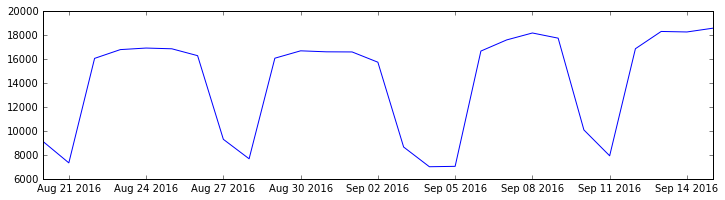

In [18]:
#Let's use the first station, at 59th St (from the list based on 'location' variable)
dates_59th = dates_location.iloc[0:27]
entries_59th = entries_location.iloc[0:27]

plt.figure(figsize = (12,3)) # I made this bigger so I could read the x-axis labels better
plt.plot(dates_59th, entries_59th);

**Exercise 1.8**

Make one list of counts for one week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts. Make the same list for another week, and another week, and another week. plt.plot(week_count_list) for every week_count_list you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.

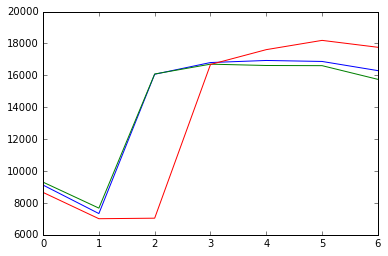

In [19]:
#First create a column to represent the day of the week
combined_location['DAY'] = pd.to_datetime(combined_location['DATE'], infer_datetime_format=True)
combined_location['DAY'] = combined_location['DAY'].dt.dayofweek

#Then created a list to represent the days
days = [0, 1, 2, 3, 4, 5, 6]

week1_entries59th = combined_location['ENTRIES'].iloc[0:7]
week2_entries59th = combined_location['ENTRIES'].iloc[7:14]
week3_entries59th = combined_location['ENTRIES'].iloc[14:21]
week4_entries59th = combined_location['ENTRIES'].iloc[21:27]

#I couldn't get the fourth week to plot because I kept only 6 days' worth of data for it (by dropping Sept.16 values)
# No matter what I did (including trying to create a week list with just 6 entries), it kept returning 'ValueError: 
# x and y must have same first dimension'

plt.plot(days, week1_entries59th);
plt.plot(days, week2_entries59th);
plt.plot(days, week3_entries59th);

**Exercise 1.9**

Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate.

In [20]:
#Sum each station over all the days in the dataframe.  Here I decide to use the 'station' variable (not 'location').
traffic = combined_station.groupby(['STATION']).sum().reset_index()
traffic = traffic[['STATION', 'ENTRIES', 'EXITS']]

#Now add entries and exits so I can get total traffic
traffic['TOTAL TRAFFIC'] = traffic['ENTRIES'] + traffic['EXITS']
traffic
most_traffic = traffic.sort_values(['TOTAL TRAFFIC'], ascending = False).reset_index()
most_traffic = most_traffic.drop('index', axis = 1)
most_traffic

,STATION,ENTRIES,EXITS,TOTAL TRAFFIC
0,34 ST-PENN STA,3735881.0,3176529.0,6912410.0
1,GRD CNTRL-42 ST,3213782.0,2901007.0,6114789.0
2,34 ST-HERALD SQ,2632336.0,2381835.0,5014171.0
3,14 ST-UNION SQ,2384126.0,2073580.0,4457706.0
4,23 ST,2523014.0,1861031.0,4384045.0
5,TIMES SQ-42 ST,2216646.0,2050067.0,4266713.0
6,86 ST,2288394.0,1925788.0,4214182.0
7,FULTON ST,2119605.0,1682052.0,3801657.0
8,42 ST-PORT AUTH,2074330.0,1556875.0,3631205.0
9,59 ST,1737630.0,1349126.0,3086756.0


**Exercise 1.10**

Make a single list of these total ridership values and plot it with plt.hist(total_ridership_counts) to get an idea about the distribution of total ridership among different stations. This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

Additional Hint: If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a plt.bar graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be 0,1,2,3,..., so you can do:
indices = range(len(total_ridership_values))
plt.bar(indices, total_ridership_values)

(array([ 278.,   57.,   17.,    6.,    4.,    2.,    4.,    1.,    1.,    1.]),
 array([  3.37000000e+02,   6.91544300e+05,   1.38275160e+06,
          2.07395890e+06,   2.76516620e+06,   3.45637350e+06,
          4.14758080e+06,   4.83878810e+06,   5.52999540e+06,
          6.22120270e+06,   6.91241000e+06]),
 <a list of 10 Patch objects>)

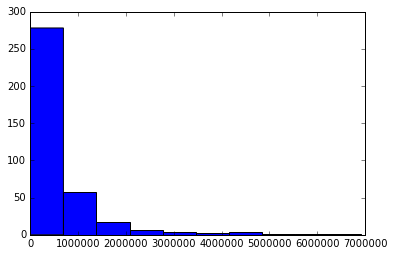

In [21]:
total_ridership = most_traffic['TOTAL TRAFFIC']
plt.hist(total_ridership)

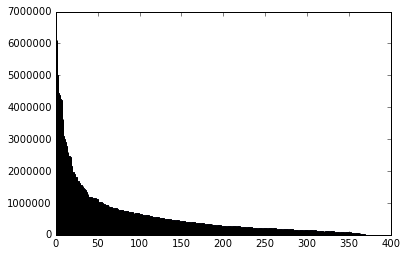

In [23]:
indices = range(len(total_ridership))
plt.bar(indices, total_ridership);